# 🌊 **Klasifikasi Tsunami Menggunakan Random Forest dan Logistic Regression**

## 🎯 **Tujuan Proyek**
Proyek ini bertujuan untuk **membangun dan membandingkan performa dua algoritma klasifikasi** dalam memprediksi kemungkinan terjadinya **tsunami** berdasarkan data parameter gempa bumi.  
Dataset yang digunakan adalah **`earthquake_data_tsunami.csv`**, yang berisi data numerik seperti magnitudo, kedalaman, lokasi, serta label target `tsunami` (0 = tidak, 1 = ya).

Proyek ini disusun untuk memenuhi **Ujian Tengah Semester (UTS)** mata kuliah **Pembelajaran Mesin**, dengan fokus pada penerapan **data preprocessing**, **pipeline modeling**, **feature selection**, serta **evaluasi model klasifikasi numerik** sesuai pedoman yang diberikan dosen pengampu.

---

## ⚙️ **Tujuan Analisis**
1. Melakukan **pembersihan data** dengan memeriksa nilai kosong, duplikat, dan outlier.  
2. Melakukan **preprocessing** data numerik serta memisahkan fitur (`X`) dan target (`y`).  
3. Membangun **dua model klasifikasi utama**:
   - **Tree-Based Model** → Random Forest  
   - **Linear-Based Model** → Logistic Regression  
4. Melakukan **eksperimen pembelajaran mesin** dengan:
   - **Dua metode penskalaan (scaling):** `StandardScaler` dan `MinMaxScaler`  
   - **Dua metode seleksi fitur (feature selection):** `SelectKBest` dan `SelectPercentile`  
5. Menggunakan **GridSearchCV** dengan **StratifiedKFold Cross Validation** untuk mencari parameter optimal.  
6. Membandingkan hasil evaluasi model berdasarkan **akurasi, presisi, recall, dan F1-score** serta menampilkan **visualisasi confusion matrix**.

---

## 🌳 **Alasan Pemilihan Algoritme**
- **Random Forest (Tree-Based)**  
  Algoritme ini kuat dalam menangani hubungan non-linear antar fitur, relatif tahan terhadap outlier, dan mampu mengukur tingkat kepentingan fitur secara langsung.

- **Logistic Regression (Linear-Based)**  
  Model ini sederhana dan efisien untuk data numerik, serta memberikan interpretasi yang jelas terhadap probabilitas kelas. Logistic Regression juga menjadi baseline penting untuk membandingkan performa pendekatan non-linear seperti Random Forest.

---

## 🧩 **Tahapan Eksperimen**
1. **Data Understanding & Cleaning**  
   Mengecek struktur data, nilai kosong, duplikat, dan distribusi fitur.  
2. **Feature Selection & Encoding**  
   Menentukan kolom fitur (X) dan target (y) serta memastikan seluruh data numerik siap diproses.  
3. **Train-Test Split**  
   Membagi data menjadi data latih dan uji (contoh: 80:20 atau 75:25 atau 70:30) dengan parameter `random_state` sesuai dua digit NPM terbesar anggota kelompok.  
4. **Pipeline Construction**  
   Membangun pipeline untuk kedua model, berisi tahap scaling → feature selection → classifier.  
5. **Model Training & Tuning**  
   Melakukan pencarian parameter terbaik menggunakan **GridSearchCV** dan validasi lipat (**StratifiedKFold**).  
6. **Evaluation & Visualization**  
   Membandingkan hasil evaluasi model menggunakan metrik klasifikasi serta menampilkan **Confusion Matrix** dan **Classification Report**.

---

## 📊 **Hasil yang Diharapkan**
- Didapatkan **model terbaik** dengan skor F1 dan akurasi tertinggi.  
- Teridentifikasi **fitur-fitur paling relevan** dalam menentukan potensi tsunami.  
- Diperoleh **perbandingan performa** antara model Random Forest dan Logistic Regression sebagai dasar analisis efektivitas algoritme berbasis pohon dan linear.

---


In [1]:
# ============================================================
# 🧮 IMPORT LIBRARY — Pengolahan Data, Modeling, & Evaluasi
# ============================================================

# 📦 Manipulasi Data

import numpy as np
import pandas as pd  

# 📊 Visualisasi
import matplotlib.pyplot as plt

# 🔧 Pembagian data & pencarian hyperparameter
from sklearn.model_selection import train_test_split            
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# ⚙️ Pra-pemrosesan & Seleksi Fitur
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif

# 🤖 Model Klasifikasi
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

# 🧩 Pipeline & Utilitas
from sklearn.pipeline import Pipeline
from sklearn.base import clone
import time

# 📈 Evaluasi Model
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score
)

# **Loading Data**

In [2]:
df_tsunami = pd.read_csv('dataset/earthquake_data_tsunami.csv',header=0)

df_tsunami.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,berpotensi
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,tidak
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,berpotensi
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,berpotensi
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,berpotensi


In [3]:
# Info cepat tentang kolom & tipe datanya
print("Jumlah baris, kolom:", df_tsunami.shape)    
print("\nTipe data:")
print(df_tsunami.dtypes)

Jumlah baris, kolom: (782, 13)

Tipe data:
magnitude    float64
cdi            int64
mmi            int64
sig            int64
nst            int64
dmin         float64
gap          float64
depth        float64
latitude     float64
longitude    float64
Year           int64
Month          int64
tsunami       object
dtype: object


### **Pembersihan Data (Bagian 1): Buang Kolom Tak Perlu**
- Kolom `Year` dan `month` tidak dibutuhkan untuk pemodelan (tidak dibutuhkan untuk prediksi), jadi kita hapus.


In [4]:
# 1) Hapus kolom 'year' dan `month`
df_tsunami2 = df_tsunami.drop(columns=['Year', 'Month'], errors='ignore')
df_tsunami2.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,berpotensi
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,tidak
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,berpotensi
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,berpotensi
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,berpotensi


### **Pembersihan Data (Bagian 2): Cek & Tangani Missing Value**
- Kita cek data **null/kosong/NaN** per kolom.  
- Kolom **`texture_mean`** memiliki beberapa nilai kosong dan diisi dengan **median** (aman saat kita belum tahu distribusinya).


In [5]:
# 1) Cek jumlah nilai kosong per kolom
print("Jumlah nilai kosong per kolom:\n", df_tsunami2.isnull().sum()) 

Jumlah nilai kosong per kolom:
 magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
tsunami      0
dtype: int64


In [6]:
# 2) Contoh pengisian: gunakan median untuk kolom 'texture_mean' (jika ada)
median_chole = df_tsunami2['cdi'].median()
df_tsunami2['cdi'] = df_tsunami2['cdi'].fillna(median_chole)
print("\nMedian cdi:", median_chole)
#karena dataset yang kami miliki tidak memiliki data kosong/NaN/NULL maka kami mengambil salah satu contoh penangan jika ada data kosong di cdi


Median cdi: 5.0


In [7]:
# 3) Validasi ulang
print("\nSetelah inputasi, nilai kosong per kolom:\n", df_tsunami2.isnull().sum())


Setelah inputasi, nilai kosong per kolom:
 magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
tsunami      0
dtype: int64


### **Pembersihan Data (Bagian 3): Cek & Hapus Duplikat**
- Data yang **kembar** dapat merusak evaluasi model.
- Kita cek duplikat lalu **drop** agar setiap baris unik.


In [8]:
before = df_tsunami2.shape
dupes = df_tsunami2[df_tsunami2.duplicated(keep=False)]
print(f"Jumlah baris duplikat (terhitung ganda): {dupes.shape[0]}")
df_tsunami3 = df_tsunami2.drop_duplicates(keep='first')
print("Bentuk data sebelum/ setelah hapus duplikat:", before, "->", df_tsunami3.shape)

Jumlah baris duplikat (terhitung ganda): 0
Bentuk data sebelum/ setelah hapus duplikat: (782, 11) -> (782, 11)


### **Pembersihan Data (Bagian 4): Cek Outlier**
- Data yang **Outlier** dapat merusak evaluasi model.
- Kenapa tidak dihapus? karena itu adalah fenomena nyata dan **Penting** untuk klasifikasi.


In [9]:
numeric_cols = df_tsunami3.select_dtypes(include=np.number).columns

print("Pengecekan outlier untuk setiap fitur numerik:\n")
for col in numeric_cols:
    Q1 = df_tsunami3[col].quantile(0.25)
    Q3 = df_tsunami3[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_tsunami3[col] < (Q1 - 1.5 * IQR)) | (df_tsunami3[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"{col}: {outliers} outlier")

Pengecekan outlier untuk setiap fitur numerik:

magnitude: 37 outlier
cdi: 0 outlier
mmi: 1 outlier
sig: 73 outlier
nst: 0 outlier
dmin: 61 outlier
gap: 48 outlier
depth: 139 outlier
latitude: 0 outlier
longitude: 0 outlier


In [10]:
# Tangani outlier depth dengan batas atas
df_tsunami3['depth'] = np.where(df_tsunami3['depth'] > 700, 700, df_tsunami3['depth'])
df_tsunami4 = df_tsunami3.copy()

# Hapus outlier di semua kolom numerik
for col in numeric_cols:
    Q1 = df_tsunami3[col].quantile(0.25)
    Q3 = df_tsunami3[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_tsunami4 = df_tsunami4[(df_tsunami4[col] >= lower) & (df_tsunami4[col] <= upper)]

print("\nJumlah data sebelum:", len(df_tsunami3))
print("\nJumlah data sesudah :", len(df_tsunami4))

print("Pengecekan outlier untuk setiap fitur numerik:\n")
for col in numeric_cols:
    Q1 = df_tsunami4[col].quantile(0.25)
    Q3 = df_tsunami4[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_tsunami4[col] < (Q1 - 1.5 * IQR)) | (df_tsunami4[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"{col}: {outliers} outlier")



Jumlah data sebelum: 782

Jumlah data sesudah : 478
Pengecekan outlier untuk setiap fitur numerik:

magnitude: 17 outlier
cdi: 0 outlier
mmi: 0 outlier
sig: 26 outlier
nst: 0 outlier
dmin: 35 outlier
gap: 5 outlier
depth: 21 outlier
latitude: 4 outlier
longitude: 13 outlier


###  **Encode Label**

- **Tujuan:** Mengubah kolom `diagnosis` dari huruf menjadi angka agar bisa diproses oleh model ML.  
  - `berpotensi` → 1 (**berpotensi tsunami**)  
  - `tidak` → 0 (**tidak berpotensi tsunami**)


In [11]:
# Mengubah label tsunami dari huruf menjadi angka:
df_tsunami4['tsunami'] = df_tsunami4['tsunami'].map({'berpotensi': 1, 'tidak':0})

### **Pembagian Data: Train/Test Split**

- **X**: semua fitur kecuali label target.  
- **y**: kolom target, yaitu `tsunami` (1 = Ya)
 atau (0 = Tidak )
- Kita pakai **30%** data untuk **test** dan sisanya untuk **train**.


In [12]:
# Menentukan X sebagai fitur (semua kolom kecuali tsunami)
X = df_tsunami4.drop(columns=['tsunami'])

# Menentukan y sebagai target (kolom tsunami)
y = df_tsunami4['tsunami']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state = 98, stratify=y
)                                                          

print("Ukuran X_train, X_test:", X_train.shape, X_test.shape)


Ukuran X_train, X_test: (382, 10) (96, 10)


####  **Membangun Model Random Forest dengan Pipeline + GridSearchCV**

Pada bagian ini, kita akan membangun model **Random Forest Classifier** — salah satu algoritma ensemble paling populer dan kuat untuk tugas klasifikasi.

###  Konsep Singkat Random Forest:
Random Forest bekerja dengan membangun **banyak pohon keputusan (decision trees)** secara acak, kemudian menggabungkan hasilnya untuk menghasilkan prediksi akhir yang lebih stabil dan akurat.  
-> Semakin banyak pohon, semakin kuat generalisasi model, meski waktu komputasi juga meningkat.

###  Alur Pipeline:
1. **Scaling (MinMaxScaler vs StandardScaler)**  
   Tidak wajib untuk Random Forest (karena berbasis pohon), tetapi tetap digunakan agar pipeline konsisten dengan model lain seperti SVM atau Logistic Regression.
2. **Feature Selection (SelectKBest vs SelectPercentile)**  
   Menyaring fitur yang paling berpengaruh terhadap target:  
   - `SelectKBest`: memilih *jumlah fitur terbaik (k)*  
   - `SelectPercentile`: memilih *persentase fitur terbaik (%)*  
3. **Model (RandomForestClassifier)**  
   Parameter penting yang diuji:
   - `n_estimators`: jumlah pohon dalam hutan  
   - `max_depth`: kedalaman maksimum tiap pohon  
   - `min_samples_split`: jumlah minimum sampel agar cabang pohon dapat dipecah  
   - `class_weight='balanced'`: menyeimbangkan bobot antar kelas


###  Tujuan GridSearchCV:
Melakukan **pencarian otomatis kombinasi parameter terbaik** untuk menghasilkan model dengan performa optimal,  
dengan evaluasi menggunakan **5-fold Stratified Cross Validation** dan metrik **F1-score**.

Output dari cell ini:
- Model Random Forest terbaik  
- Waktu komputasi total  
- Parameter optimal hasil pencarian GridSearch


In [14]:
# ============================================================
#  PIPELINE: Scaling → Feature Selection → Random Forest
# ============================================================


# Rancang pipeline: gabungkan scaling, seleksi fitur, dan model Random Forest
pipe_rf = Pipeline(steps=[      
    ('feat_select', SelectKBest()),              
    ('clf', RandomForestClassifier(      
        class_weight='balanced', 
        random_state=98,           
        n_estimators=-1                     
    ))
])

# GridSearch: dua jenis seleksi fitur (KBest dan Percentile) dengan kombinasi parameter model
params_grid_rf = [
    # Kandidat 1: pakai SelectKBest
    {
        'feat_select': [SelectKBest()],
        'feat_select__k': np.arange(1, 10),        # jumlah fitur terbaik yang diuji
        'clf__n_estimators': [100, 300, 500],      # jumlah pohon
        'clf__max_depth': [None, 5, 10],           # batas kedalaman tiap pohon
        'clf__min_samples_split': [2, 5, 10]       # jumlah minimal sampel untuk split node
    },
    # Kandidat 2: pakai SelectPercentile
    {
        'feat_select': [SelectPercentile()],
        'feat_select__percentile': np.arange(30, 80, 10),
        'clf__n_estimators': [100, 300, 500],
        'clf__max_depth': [None, 5, 10],
        'clf__min_samples_split': [2, 5, 10]
    }
]

# StratifiedKFold: memastikan proporsi kelas tetap sama di setiap fold CV
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=98) 

# Jalankan GridSearchCV: mencari kombinasi parameter terbaik dengan metrik F1

gscv_rf = GridSearchCV(
    pipe_rf,                
    params_grid_rf,         
    cv=SKF,         
    scoring='f1',     
    verbose=1,        
    n_jobs=-1         
)

print("Menjalankan GridSearch untuk Random Forest...")
start = time.time()

gscv_rf.fit(X_train, y_train) 

print(f"GridSearch Random Forest selesai dalam {time.time() - start:.2f} detik")


Menjalankan GridSearch untuk Random Forest...
Fitting 5 folds for each of 378 candidates, totalling 1890 fits
GridSearch Random Forest selesai dalam 62.66 detik


###  **Evaluasi Model Random Forest**

Setelah GridSearchCV selesai, langkah berikutnya adalah **mengevaluasi performa model terbaik** yang ditemukan terhadap data uji.

###  Langkah Evaluasi:
1. **Menampilkan hasil terbaik dari GridSearchCV**
   - Nilai *Cross Validation (CV) F1-score* tertinggi  
   - Kombinasi parameter terbaik (jumlah pohon, kedalaman, dan jumlah fitur)
2. **Mengukur akurasi pada data uji (test set)**  
   Untuk menilai seberapa baik model mampu mengeneralisasi data baru.
3. **Menampilkan fitur yang terpilih**
   - Menggunakan `get_support()` untuk mengetahui fitur mana yang dianggap paling relevan oleh model.
4. **Menampilkan Confusion Matrix**
   - Visualisasi perbandingan prediksi dan label sebenarnya.  
   - Warna hijau digunakan untuk membedakan hasil Random Forest dari model lain.
5. **Menampilkan Classification Report**
   - Metrik lengkap: *precision*, *recall*, *f1-score*, dan *support* tiap kelas.
   - Membantu memahami keseimbangan performa model dalam mendeteksi kedua kelas (sehat vs sakit).

>  Tujuan utama evaluasi ini adalah memastikan model **tidak hanya akurat**,  
> tetapi juga **mampu mengenali kedua kelas secara seimbang**, terutama jika data sedikit tidak seimbang.


CV Score (F1) terbaik: 0.890196187757408
Kombinasi model terbaik: Pipeline(steps=[('feat_select', SelectKBest(k=np.int64(8))),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=98))])

Skor Test (akurasi) Random Forest: 0.8958333333333334

Fitur terbaik (terpilih): ['cdi' 'mmi' 'sig' 'nst' 'dmin' 'gap' 'latitude' 'longitude']


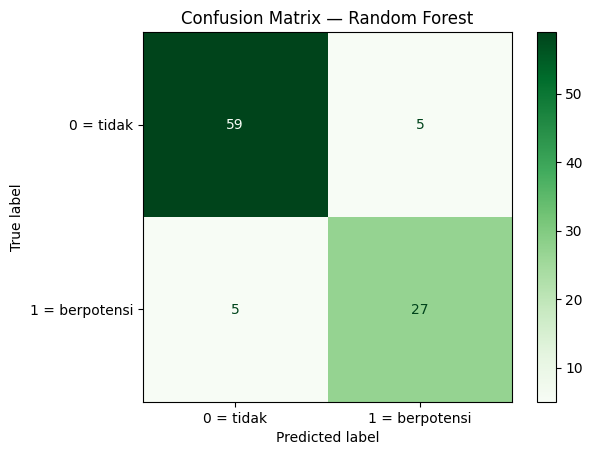


Classification Report — Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        64
           1       0.84      0.84      0.84        32

    accuracy                           0.90        96
   macro avg       0.88      0.88      0.88        96
weighted avg       0.90      0.90      0.90        96



In [15]:
#  Evaluasi hasil GridSearch
print("CV Score (F1) terbaik:", gscv_rf.best_score_)
print("Kombinasi model terbaik:", gscv_rf.best_estimator_) 

rf_test_score = gscv_rf.best_estimator_.score(X_test, y_test)
print("\nSkor Test (akurasi) Random Forest:", rf_test_score)

#  Fitur terbaik (jika selector mendukung get_support)
selector = gscv_rf.best_estimator_.named_steps['feat_select']
if hasattr(selector, 'get_support'):
    mask = selector.get_support()
    selected = np.array(X.columns)[mask]
    print("\nFitur terbaik (terpilih):", selected)


#  Confusion Matrix & Classification Report
rf_pred = gscv_rf.predict(X_test) 
cm_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['0 = tidak','1 = berpotensi']) 
disp_rf.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix — Random Forest")
plt.show()

# Silakan diisi bagian ini dengan kode yang tepat ()
print("\nClassification Report — Random Forest:\n", classification_report(y_test, rf_pred))


### 📊 Interpretasi:

- Random Forest memberikan akurasi 90% dan keseimbangan precision–recall yang baik.

- Model ini relatif stabil terhadap outlier dan noise, cocok untuk dataset bencana alam yang fluktuatif.

- Jumlah false positive dan false negative sama (5 kasus masing-masing) → artinya seimbang dalam mendeteksi kedua kelas.

###  **Membangun Model Logistic Regression dengan Pipeline + GridSearchCV**

Langkah ini bertujuan untuk membangun model **klasifikasi Logistic Regression** secara sistematis menggunakan **pipeline** dan **GridSearchCV**.

#### ⚙️ **Alur Pipeline**

1. **Scaling (StandardScaler vs MinMaxScaler)**  
   Scaling digunakan untuk menyeragamkan rentang nilai antar fitur agar model dapat belajar secara stabil.  
   - `StandardScaler` mengubah data menjadi distribusi dengan **rata-rata 0 dan standar deviasi 1**.  
   - `MinMaxScaler` menyesuaikan data dalam **rentang [0,1]**.  
   Proses scaling ini penting karena *Logistic Regression* merupakan model linear yang **peka terhadap perbedaan skala fitur**, sehingga bobot koefisien yang dihasilkan tetap proporsional.

2. **Feature Selection (SelectKBest vs SelectPercentile)**  
   Tahapan ini bertujuan untuk **memilih fitur paling relevan** terhadap variabel target.  
   - `SelectKBest` memilih *k fitur terbaik* berdasarkan skor statistik tertentu (`f_classif`).  
   - `SelectPercentile` memilih *persentase fitur terbaik* (misalnya 30–80%) berdasarkan skor relevansi.  
   Kedua metode ini dibandingkan dalam **GridSearchCV** untuk menentukan kombinasi fitur yang menghasilkan performa klasifikasi terbaik.

3. **Model (LogisticRegression)**  
   Logistic Regression merupakan **model linear untuk klasifikasi biner**, yang memprediksi probabilitas suatu kelas dengan menggabungkan fitur-fitur input secara linear.  
   Parameter yang dioptimasi:  
   - `penalty`: menentukan jenis regularisasi (L1 atau L2) untuk mencegah overfitting.  
   - `C`: mengatur kekuatan regularisasi (nilai kecil = regularisasi kuat).  
   - `solver='liblinear'`: algoritme optimasi yang mendukung penalti L1 dan L2.  
   Selain itu, digunakan `class_weight='balanced'` untuk mengatasi ketidakseimbangan jumlah kelas pada dataset tsunami.


####  Tujuan GridSearchCV:
- **Mencari kombinasi parameter terbaik** untuk menghasilkan performa optimal.  
- Evaluasi dilakukan dengan **5-fold Stratified Cross Validation**,  
  menggunakan metrik **F1-score** (seimbang antara presisi dan recall).

Setelah pipeline dan parameter grid disiapkan, dilakukan proses pelatihan (`fit`) untuk menemukan model Logistic Regression terbaik.


In [16]:
# PIPELINE: Scaling → Feature Selection → Logistic Regression

# Rancang pipeline: gabungkan preprocessing + feature selection + model
pipe_lr = Pipeline(steps=[
  	('scaler', MinMaxScaler()),
    ('feat_select', SelectKBest()),
    ('clf', LogisticRegression(      # model klasifikasi
        class_weight='balanced', 
        solver='liblinear', 
        max_iter=500              
    ))
])

# GridSearch: daftar kombinasi parameter yang akan diuji
params_grid_lr = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'feat_select': [SelectKBest()], 
        'feat_select__k': np.arange(1, 10),             # jumlah fitur terbaik yang dicoba
        'clf__penalty': ['l1', 'l2'],                   # jenis regularisasi
        'clf__C': [0.01, 0.1, 1, 10],                   # kekuatan regularisasi
    },
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'feat_select': [SelectPercentile()],                # alternatif: seleksi berdasar persentase
        'feat_select__percentile': np.arange(20, 80, 10),
        'clf__penalty': ['l1', 'l2'],
        'clf__C': [0.01, 0.1, 1, 10],
    }
]

# Stratified K-Fold: menjaga proporsi label seimbang di setiap fold CV
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=98)

# Jalankan GridSearchCV untuk mencari kombinasi parameter terbaik
gscv_lr = GridSearchCV(
    pipe_lr,
    params_grid_lr,
    cv=SKF,
    scoring='f1',       # metrik utama: F1-score
    verbose=1,          # tampilkan progres selama proses
    n_jobs=-1           # gunakan semua core CPU
)

print("Menjalankan GridSearch untuk Logistic Regression...")
start = time.time()
gscv_lr.fit(X_train, y_train)
print(f"GridSearch Logistic Regression selesai dalam {time.time() - start:.2f} detik")


Menjalankan GridSearch untuk Logistic Regression...
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
GridSearch Logistic Regression selesai dalam 1.08 detik


###  **Evaluasi Model Logistic Regression**

Setelah proses *Grid Search* selesai, langkah berikutnya adalah **mengevaluasi performa model terbaik** yang ditemukan.

####  Langkah Evaluasi:
1. **Menampilkan hasil terbaik dari GridSearchCV**
   - Nilai *Cross Validation (CV) F1-score* tertinggi
   - Kombinasi parameter terbaik (fitur, penalti, dan nilai C)
2. **Menghitung akurasi pada data uji (test set)**  
   Untuk mengetahui seberapa baik model mengeneralisasi pada data baru.
3. **Melihat fitur yang terpilih**
   - Menggunakan metode `get_support()` dari *feature selector* untuk menampilkan fitur-fitur penting.
4. **Menampilkan Confusion Matrix**
   - Visualisasi hasil prediksi model terhadap label asli.
   - Memberi gambaran kesalahan klasifikasi antar kelas.
5. **Menampilkan Classification Report**
   - Metrik lengkap: *precision, recall, f1-score,* dan *support* untuk setiap kelas.
   - Membantu memahami performa model dalam konteks keseimbangan antara deteksi positif dan negatif.

>  Tujuan akhirnya adalah memastikan bahwa model Logistic Regression tidak hanya akurat,
> tetapi juga **seimbang dalam mendeteksi kedua kelas** (0 = Tidak, 1 = Tsunami).


CV Score (F1) terbaik: 0.8347319843347648
Kombinasi model terbaik: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('feat_select', SelectKBest(k=np.int64(3))),
                ('clf',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=500, solver='liblinear'))])

Skor Test (akurasi) Logistic Regression: 0.8229166666666666

Fitur terbaik (terpilih): ['cdi' 'nst' 'dmin']


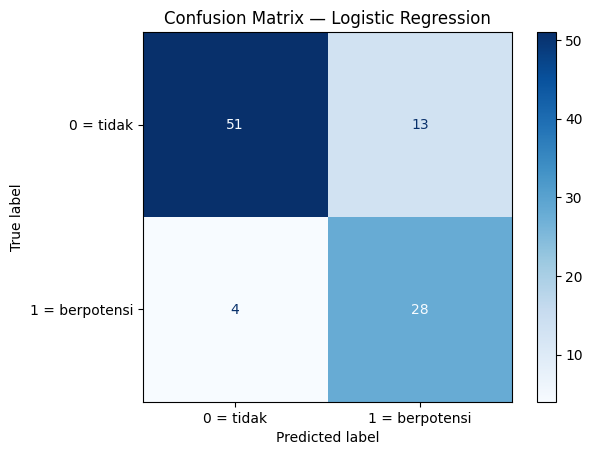


Classification Report — Logistic Regression:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86        64
           1       0.68      0.88      0.77        32

    accuracy                           0.82        96
   macro avg       0.81      0.84      0.81        96
weighted avg       0.85      0.82      0.83        96



In [17]:
# Tampilkan hasil terbaik dari GridSearch
print("CV Score (F1) terbaik:", gscv_lr.best_score_)
print("Kombinasi model terbaik:", gscv_lr.best_estimator_)

# Hitung akurasi model terbaik pada data uji
lr_test_score = gscv_lr.best_estimator_.score(X_test, y_test)
print("\nSkor Test (akurasi) Logistic Regression:", lr_test_score)

# Tampilkan fitur terbaik (jika feature selector mendukung metode get_support)
selector = gscv_lr.best_estimator_.named_steps['feat_select']
if hasattr(selector, 'get_support'):
    mask = selector.get_support()
    selected = np.array(X.columns)[mask]
    print("\nFitur terbaik (terpilih):", selected)

# Buat prediksi pada data uji dan tampilkan Confusion Matrix
lr_pred = gscv_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, lr_pred)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['0 = tidak','1 = berpotensi'])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix — Logistic Regression")
plt.show()

# Tampilkan classification report (precision, recall, f1-score)
print("\nClassification Report — Logistic Regression:\n", classification_report(y_test, lr_pred))


### **Langkah Akhir — Visualisasi Perbandingan Dua Model Terbaik**

Pada tahap ini, kita akan membandingkan **hasil klasifikasi dari dua model terbaik** yang telah dibangun menggunakan **Pipeline + GridSearchCV**:

- **Logistic Regression** → dengan optimasi regularisasi (`penalty`, `C`) dan seleksi fitur terbaik
- **Random Forest** → dengan optimasi jumlah pohon (`n_estimators`), kedalaman maksimum (`max_depth`), dan fitur terbaik  

#### **Tujuan:**
Menampilkan **Confusion Matrix** dari dua model secara berdampingan, agar kita dapat:
- Membandingkan pola kesalahan klasifikasi tiap model.  
- Melihat model mana yang **paling akurat** dan **paling seimbang** dalam mengenali kedua kelas:  
  - `0 = Tidak`  
  - `1 = Tsunami`  

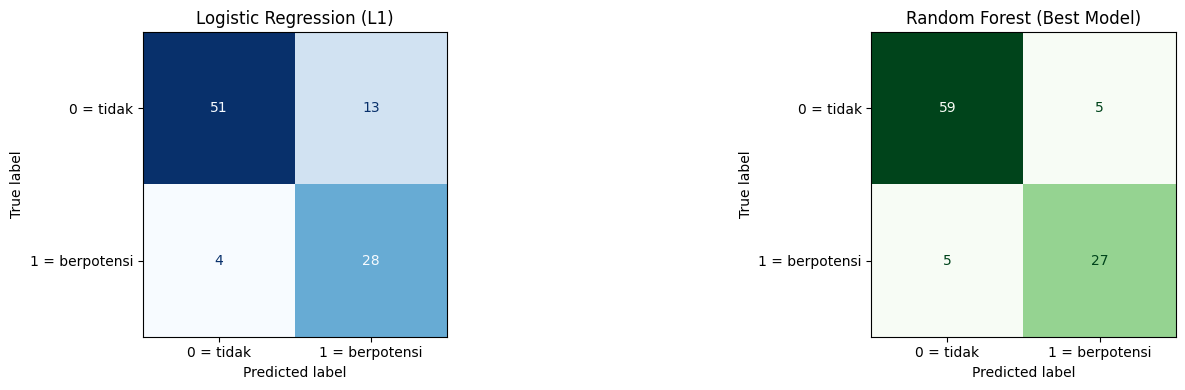

In [18]:
# Buat figure dengan 3 subplot berdampingan (1 baris, 3 kolom)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 4))


# Plot Confusion Matrix untuk Random Forest
disp_rf.plot(ax=ax2, cmap=plt.cm.Greens, colorbar=False)
ax2.set_title("Random Forest (Best Model)") # judul subplot pertama

# Plot Confusion Matrix untuk Logistic Regression
disp_lr.plot(ax=ax1, cmap=plt.cm.Blues, colorbar=False)
ax1.set_title("Logistic Regression (L1)")   # judul subplot kedua

# Rapikan tata letak agar subplot tidak tumpang tindih
plt.tight_layout()
plt.show()  # tampilkan semua plot


In [19]:
import pickle
acc_rf = accuracy_score(y_test, rf_pred)
acc_lr = accuracy_score(y_test, lr_pred)

if acc_rf >= acc_lr:
    best_model = gscv_rf.best_estimator_
    best_name = "RandomForest"
else:
    best_model = gscv_lr.best_estimator_
    best_name = "LogisticRegression"

with open(f"model/BestModel_CLF_{best_name}_KERAS.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"\n✅ Model terbaik: {best_name}")
print(f"✅ File tersimpan sebagai: BestModel_{best_name}_KERAS.pkl")


✅ Model terbaik: RandomForest
✅ File tersimpan sebagai: BestModel_RandomForest_KERAS.pkl
